In [88]:
df = pd.read_csv('datasets/raw_data.csv', index_col=[0])
df.to_csv('./datasets/cleaned_data.csv')

In [84]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.model_selection import train_test_split
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import xgboost

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_roc_curve, classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [86]:
!ls

Classification.ipynb datasets             requirements.txt
Procfile             fastapp.py           test_model.py
__pycache__          functions            train.py
clean_data.py        outputs


In [85]:
pd.read_csv('datasets/cleaned_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/cleaned_data.csv'

In [3]:
sns.__version__

'0.11.2'

In [4]:
df=pd.read_csv('/Users/hyacinthampadu/Documents/Jos Folder/Data Science/Portfolio/Churn Prediction in a vehicle insurance company in Ghana/datasets/raw_data.csv')

In [5]:
df.head()

,Unnamed: 0,city,churn,type_of_plan,highest_level_education,work_status,sex,salary_monthly,relationship_status,payment_per_month,weeks_since_claim,open_policies,Renew Offer Type,reachability,claim_amount,type_of_vehicle
0,0,Tamale,No,primary_plan,Bachelor,Employed,female,9702.413793,Married,138,138.0,1,1,contacting_agent,384.811147,2-door_car
1,1,Takoradi,No,extended_plan,Bachelor,Unemployed,female,0.000000,Single,188,56.0,8,3,contacting_agent,1131.464935,4-door_car
2,2,Cape_coast,No,premium_plan,Bachelor,Employed,female,8408.103448,Married,216,77.0,2,1,contacting_agent,566.472247,2-door_car
3,3,Accra,No,primary_plan,Bachelor,Unemployed,male,0.000000,Married,212,77.0,7,1,customer_call_centre,529.881344,SUV
4,4,Tamale,No,primary_plan,Bachelor,Employed,male,7557.931034,Single,146,52.0,1,1,contacting_agent,138.130879,4-door_car


In [6]:
df=df.drop(columns='Unnamed: 0')

In [7]:
cat_features=['city','churn','type_of_plan','highest_level_education','work_status',
    'sex','relationship_status','reachability','type_of_vehicle']

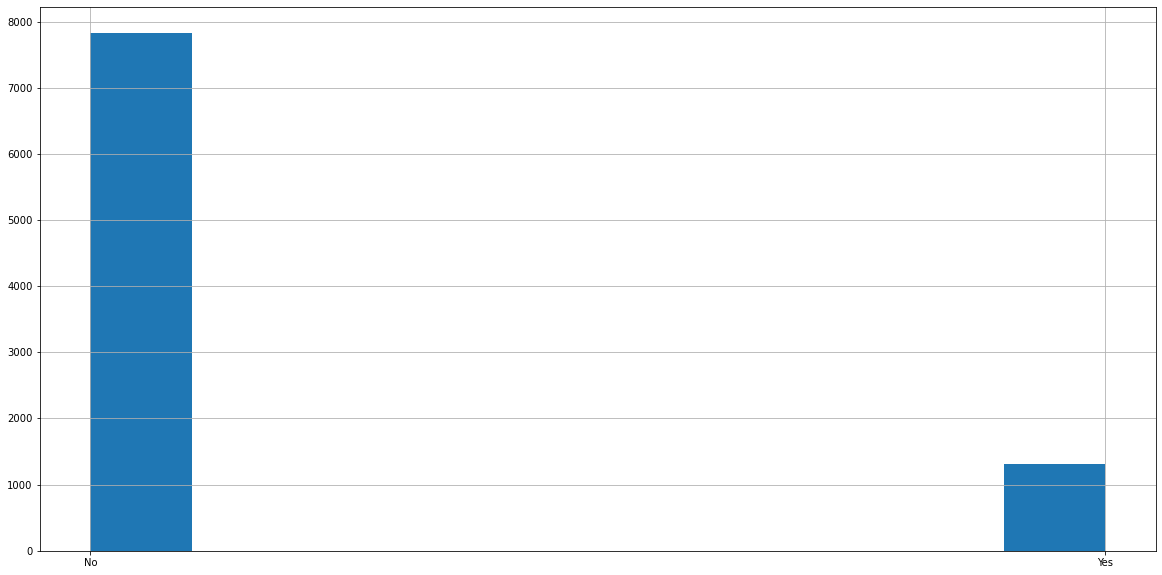

In [8]:
plt.figure(figsize=(20,10)) 
df['churn'].hist();

<AxesSubplot:>

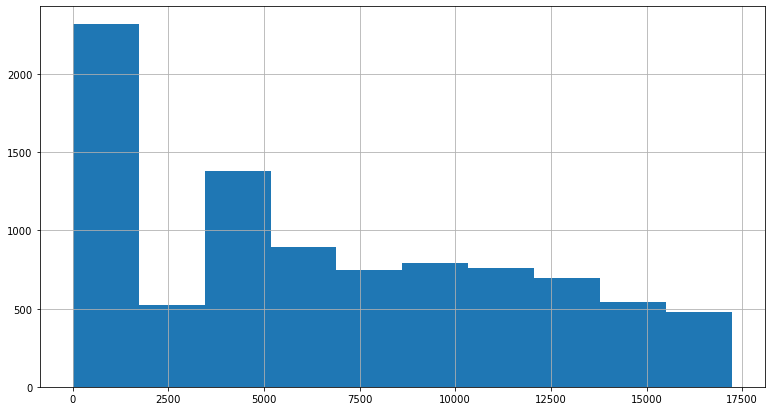

In [9]:
plt.figure(figsize=(13,7))
df['salary_monthly'].hist()

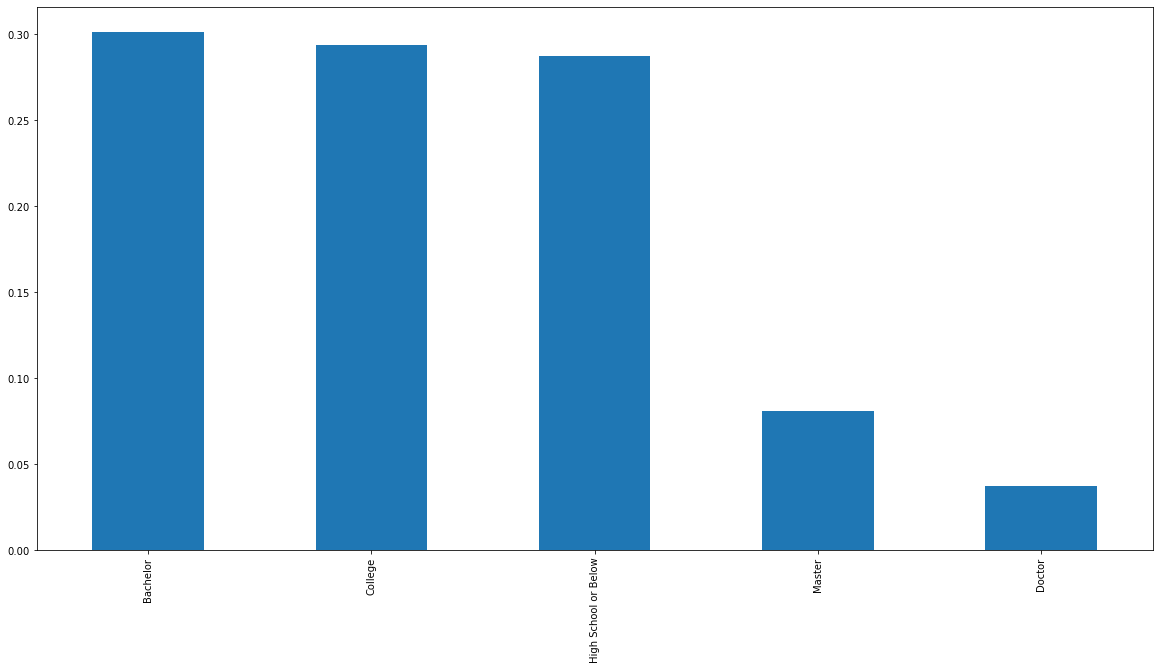

In [10]:
plt.figure(figsize=(20,10)) 
df['highest_level_education'].value_counts('normalize').plot(kind='bar');

In [11]:
df.corr()

,salary_monthly,payment_per_month,weeks_since_claim,open_policies,Renew Offer Type,claim_amount
salary_monthly,1.000000,-0.016665,-0.026621,-0.008656,0.139856,-0.355254
payment_per_month,-0.016665,1.000000,0.004989,-0.011233,-0.070285,0.632017
weeks_since_claim,-0.026621,0.004989,1.000000,0.009231,-0.016243,0.007667
open_policies,-0.008656,-0.011233,0.009231,1.000000,-0.081073,-0.002354
Renew Offer Type,0.139856,-0.070285,-0.016243,-0.081073,1.000000,-0.086558
claim_amount,-0.355254,0.632017,0.007667,-0.002354,-0.086558,1.000000


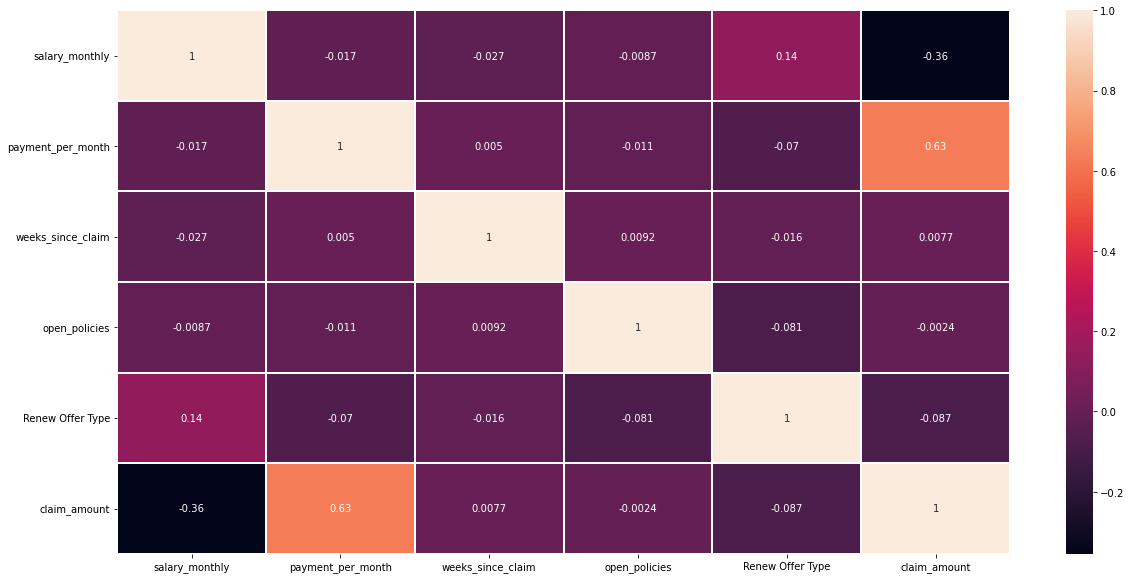

In [12]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True,linewidths = 2)
plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


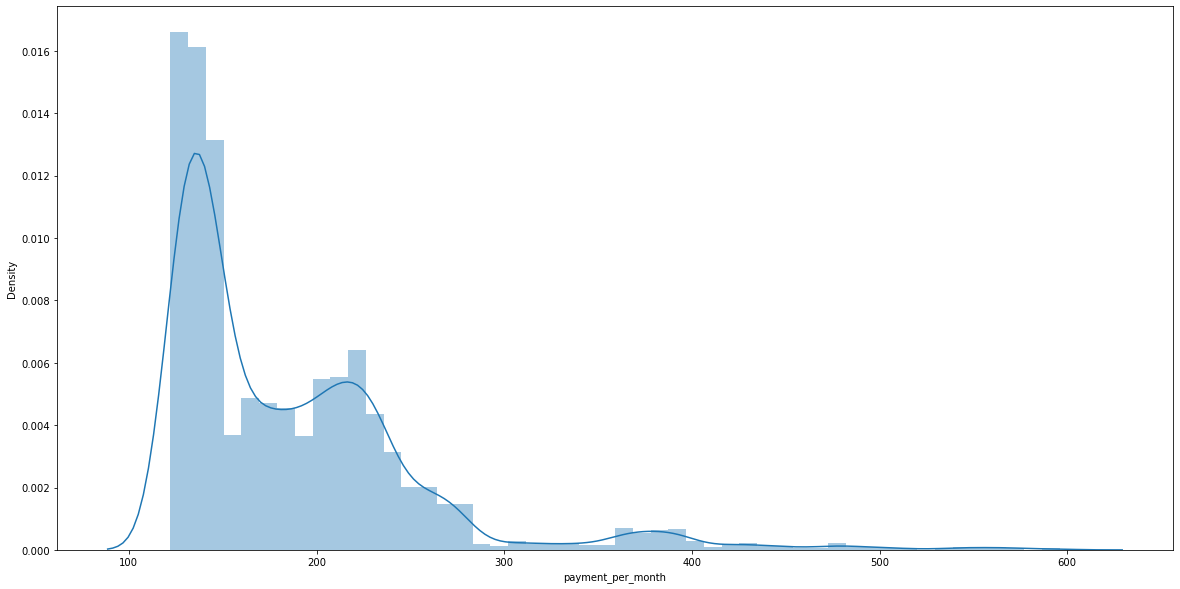

In [13]:
plt.figure(figsize=(20,10)) 
sns.distplot(df['payment_per_month']);

In [14]:
df_ohe=pd.get_dummies(df[cat_features])

In [15]:
df_num=df.drop(*[cat_features], axis=1)

In [16]:
pd.concat([df_ohe, df_num],axis=1)

,city_Accra,city_Cape_coast,city_Kumasi,city_Takoradi,city_Tamale,churn_No,churn_Yes,type_of_plan_extended_plan,type_of_plan_premium_plan,type_of_plan_primary_plan,highest_level_education_Bachelor,highest_level_education_College,highest_level_education_Doctor,highest_level_education_High School or Below,highest_level_education_Master,work_status_Disabled,work_status_Employed,work_status_Medical Leave,work_status_Retired,work_status_Unemployed,sex_female,sex_male,relationship_status_Divorced,relationship_status_Married,relationship_status_Single,reachability_contacting_agent,reachability_contacting_branch_directly,reachability_customer_call_centre,reachability_via_the_web,type_of_vehicle_2-door_car,type_of_vehicle_4-door_car,type_of_vehicle_SUV,type_of_vehicle_Sports Car,type_of_vehicle_luxirious_car,type_of_vehicle_luxurious_suv,salary_monthly,payment_per_month,weeks_since_claim,open_policies,Renew Offer Type,claim_amount
0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,9702.413793,138,138.0,1,1,384.811147
1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0.000000,188,56.0,8,3,1131.464935
2,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,8408.103448,216,77.0,2,1,566.472247
3,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0.000000,212,77.0,7,1,529.881344
4,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,7557.931034,146,52.0,1,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,12403.620690,146,77.0,2,2,198.234764
9130,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,3724.827586,158,60.0,1,1,379.200000
9131,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0.000000,170,39.0,2,1,790.784983
9132,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,3782.931034,192,146.0,3,3,691.200000


In [73]:
df[cat_features]['city'].value_counts()

Accra         3150
Kumasi        2601
Takoradi      1703
Cape_coast     882
Tamale         798
Name: city, dtype: int64

In [ ]:
cat_features

In [18]:
df_ohe=pd.get_dummies(df.drop(columns=['payment_per_month','weeks_since_claim','open_policies','Renew Offer Type','claim_amount','salary_monthly','churn']))

In [19]:
df_ohe.head()

,city_Accra,city_Cape_coast,city_Kumasi,city_Takoradi,city_Tamale,type_of_plan_extended_plan,type_of_plan_premium_plan,type_of_plan_primary_plan,highest_level_education_Bachelor,highest_level_education_College,highest_level_education_Doctor,highest_level_education_High School or Below,highest_level_education_Master,work_status_Disabled,work_status_Employed,work_status_Medical Leave,work_status_Retired,work_status_Unemployed,sex_female,sex_male,relationship_status_Divorced,relationship_status_Married,relationship_status_Single,reachability_contacting_agent,reachability_contacting_branch_directly,reachability_customer_call_centre,reachability_via_the_web,type_of_vehicle_2-door_car,type_of_vehicle_4-door_car,type_of_vehicle_SUV,type_of_vehicle_Sports Car,type_of_vehicle_luxirious_car,type_of_vehicle_luxurious_suv
0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0


In [83]:
df[cat_features]['city'].value_counts()

Accra         3150
Kumasi        2601
Takoradi      1703
Cape_coast     882
Tamale         798
Name: city, dtype: int64

In [20]:
cat_features=['city','churn','type_of_plan','highest_level_education','work_status',
    'sex','salary_monthly','relationship_status','reachability','claim_amount','type_of_vehicle']

In [21]:
df_left=df[['payment_per_month','weeks_since_claim','open_policies','Renew Offer Type','claim_amount','salary_monthly','churn']]

In [22]:
df_new=pd.concat([df_left, df_ohe],axis=1)

In [23]:
df_new.head()

,payment_per_month,weeks_since_claim,open_policies,Renew Offer Type,claim_amount,salary_monthly,churn,city_Accra,city_Cape_coast,city_Kumasi,city_Takoradi,city_Tamale,type_of_plan_extended_plan,type_of_plan_premium_plan,type_of_plan_primary_plan,highest_level_education_Bachelor,highest_level_education_College,highest_level_education_Doctor,highest_level_education_High School or Below,highest_level_education_Master,work_status_Disabled,work_status_Employed,work_status_Medical Leave,work_status_Retired,work_status_Unemployed,sex_female,sex_male,relationship_status_Divorced,relationship_status_Married,relationship_status_Single,reachability_contacting_agent,reachability_contacting_branch_directly,reachability_customer_call_centre,reachability_via_the_web,type_of_vehicle_2-door_car,type_of_vehicle_4-door_car,type_of_vehicle_SUV,type_of_vehicle_Sports Car,type_of_vehicle_luxirious_car,type_of_vehicle_luxurious_suv
0,138,138.0,1,1,384.811147,9702.413793,No,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,188,56.0,8,3,1131.464935,0.000000,No,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0
2,216,77.0,2,1,566.472247,8408.103448,No,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0
3,212,77.0,7,1,529.881344,0.000000,No,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0
4,146,52.0,1,1,138.130879,7557.931034,No,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0


In [24]:
#df_new['churn']=df_new['churn'].map({'No':0,'Yes':1})

In [25]:
df_new['churn']=df_new['churn'].replace({'No':0,'Yes':1})

In [26]:
df_new['churn'].value_counts(normalize=True)

0    0.856799
1    0.143201
Name: churn, dtype: float64

In [27]:
X=df_new.drop(columns='churn')
y=df_new['churn']

In [28]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y, test_size=0.2, random_state=0)

accuracy: 0.8631636562671046
f1: 0.1987179487179487
recall: 0.7380952380952381
precision: 0.11481481481481481


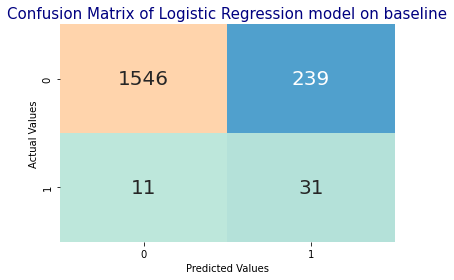

In [29]:
##baseline
model=LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
pred= model.predict(X_valid)
print('accuracy:',accuracy_score(pred, y_valid))
print('f1:',f1_score(pred, y_valid,zero_division=1))
print('recall:',recall_score(pred, y_valid,zero_division=1))
print('precision:',precision_score(pred, y_valid,zero_division=1))
sns.heatmap(confusion_matrix(pred, y_valid),annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False,cmap='icefire')
plt.title('Confusion Matrix of Logistic Regression model on baseline', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

accuracy: 0.8946023634621527
f1: 0.8835568101623148
recall: 0.9866036249014972
precision: 0.8


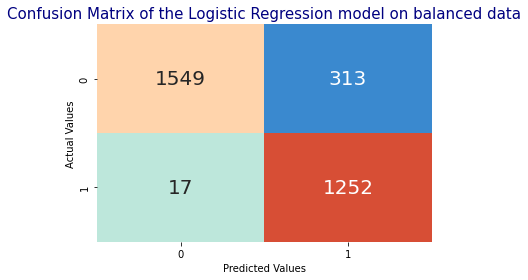

In [31]:
#balancing using smote
smote = ADASYN(random_state=0,k_neighbors=20)
X_res, y_res = smote.fit_resample(X, y)
X_train_res,X_valid_res,y_train_res,y_valid_res=train_test_split(X_res,y_res, test_size=0.2, random_state=0, stratify=y_res)
##baseline
model=LogisticRegression(solver='liblinear')
model.fit(X_train_res, y_train_res)
pred= model.predict(X_valid_res)
print('accuracy:',accuracy_score(pred, y_valid_res))
print('f1:',f1_score(pred, y_valid_res,zero_division=1))
print('recall:',recall_score(pred, y_valid_res,zero_division=1))
print('precision:',precision_score(pred, y_valid_res,zero_division=1))
sns.heatmap(confusion_matrix(pred, y_valid_res),annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False,cmap='icefire')
plt.title('Confusion Matrix of the Logistic Regression model on balanced data', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

accuracy: 0.8949217502395401
f1: 0.8839506172839506
recall: 0.9866141732283464
precision: 0.8006389776357827


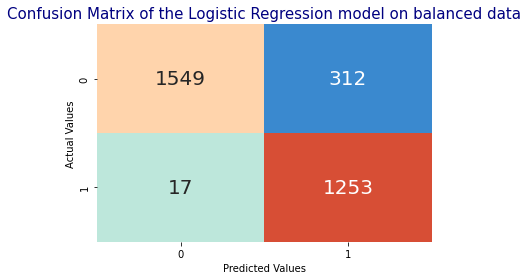

In [32]:
##with smote and scaling
#Normalize the data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_res)
X_valid_norm = scaler.transform(X_valid_res)
model=LogisticRegression(solver='liblinear')
model.fit(X_train_norm, y_train_res)
pred= model.predict(X_valid_norm)
print('accuracy:',accuracy_score(pred, y_valid_res))
print('f1:',f1_score(pred, y_valid_res,zero_division=1))
print('recall:',recall_score(pred, y_valid_res,zero_division=1))
print('precision:',precision_score(pred, y_valid_res,zero_division=1))
sns.heatmap(confusion_matrix(pred, y_valid_res),annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False,cmap='icefire')
plt.title('Confusion Matrix of the Logistic Regression model on balanced data', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

accuracy: 0.8942829766847652
f1: 0.8837372672989111
recall: 0.9812792511700468
precision: 0.8038338658146965


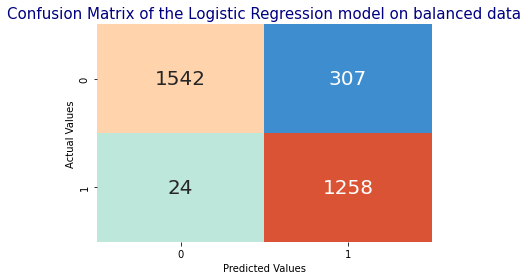

In [39]:
pred_new = model.predict_proba(X_valid_norm)[:,1] >= 0.45
print('accuracy:',accuracy_score(pred_new, y_valid_res))
print('f1:',f1_score(pred_new, y_valid_res,zero_division=1))
print('recall:',recall_score(pred_new, y_valid_res,zero_division=1))
print('precision:',precision_score(pred_new, y_valid_res,zero_division=1))
sns.heatmap(confusion_matrix(pred_new, y_valid_res),annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False,cmap='icefire')
plt.title('Confusion Matrix of the Logistic Regression model on balanced data', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

In [40]:
model = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-2, 2, 5),
    'solver' : ['newton-cg','liblinear','sag'],
    'max_iter' : [100,250, 500]
    }
]

cv_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
cv_model.fit(X_train_res, y_train_res)


The line search algorithm did not converge
The line search algorithm did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means t

The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
Line Search failed
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
Rounding errors prevent the line search from converging
The line search algorithm did not converge
Line Search failed
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The line search algorithm did not converge
The line search algorithm d

The line search algorithm did not converge
The line search algorithm did not converge
Rounding errors prevent the line search from converging
The line search algorithm did not converge
Line Search failed
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
Rounding errors prevent the line search from converging
The line search algorithm did not converge
Line Search failed
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not converge
The line search algorithm did not

The line search algorithm did not converge
The line search algorithm did not converge
newton-cg failed to converge. Increase the number of iterations.


In [49]:
pred_hpo= cv_model.best_estimator_.predict(X_valid_res)

In [52]:
cv_model.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

accuracy: 0.8575534972852124
f1: 0.8551948051948052
recall: 0.8693069306930693
precision: 0.8415335463258786


X does not have valid feature names, but LogisticRegression was fitted with feature names


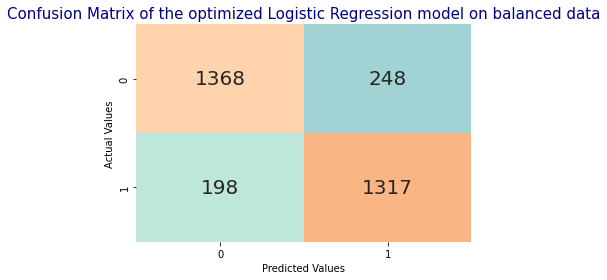

In [72]:
pred_hpo = cv_model.best_estimator_.predict_proba(X_valid_norm)[:,1] >= 0.65
print('accuracy:',accuracy_score(pred_hpo, y_valid_res))
print('f1:',f1_score(pred_hpo, y_valid_res,zero_division=1))
print('recall:',recall_score(pred_hpo, y_valid_res,zero_division=1))
print('precision:',precision_score(pred_hpo, y_valid_res,zero_division=1))
sns.heatmap(confusion_matrix(pred_hpo, y_valid_res),annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False,cmap='icefire')
plt.title('Confusion Matrix of the optimized Logistic Regression model on balanced data', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');